In [2]:
import numpy as np
import matplotlib.pyplot as plt
import audacity
import TransferFunctions as tf
import SoundUtils as sut
import scipy.signal as sig

%matplotlib notebook

In [3]:
dfiles = ['transfer/b-foot/2301_openstart.aup',
          'transfer/b-foot/2301_closing_1.aup',
          'transfer/b-foot/2301_closing_2.aup',
          'transfer/b-foot/2301_closing_3.aup',
          'transfer/b-foot/2301_closing_4.aup',
          'transfer/b-foot/2301_closing_5.aup',
          'transfer/b-foot/2301_closing_6.aup',
          'transfer/b-foot/2301_closing_7.aup',
          'transfer/b-foot/2301_closing_8.aup',
          'transfer/b-foot/2301_closing_9.aup',
          'transfer/b-foot/2301_closing_10.aup',
          'transfer/b-foot/2301_closing_11.aup',
          'transfer/b-foot/2301_closing_12.aup',
          'transfer/b-foot/2301_closing_13.aup',
          'transfer/b-foot/2301_closing_14.aup',
          'transfer/b-foot/2301_closing_15.aup',
          'transfer/b-foot/2301_closing_16.aup']

# ['transfer/b-foot/2301-2_openstart.aup',
# 'transfer/b-foot/2301-2_closing_1.aup',
# 'transfer/b-foot/2301-2_closing_2.aup',
# 'transfer/b-foot/2301-2_closing_3.aup',
# 'transfer/b-foot/2301-2_closing_4.aup',
# 'transfer/b-foot/2301-2_closing_5.aup',
# 'transfer/b-foot/2301-2_closing_6.aup',
# 'transfer/b-foot/2301-2_closing_7.aup',
# 'transfer/b-foot/2301-2_closing_8.aup',
# 'transfer/b-foot/2301-2_closing_9.aup',
# 'transfer/b-foot/2301-2_closing_10.aup',
# 'transfer/b-foot/2301-2_closing_11.aup',
# 'transfer/b-foot/2301-2_closing_12.aup',
# 'transfer/b-foot/2301-2_closing_13.aup',
# 'transfer/b-foot/2301-2_closing_14.aup',
# 'transfer/b-foot/2301-2_closing_15.aup',
# 'transfer/b-foot/2301-2_closing_16.aup']

In [4]:
ch1 = []
ch2 = []
ch3 = []
keysigRMS = []
keysigSI = []
fsens=9820
for file in dfiles:
    au = audacity.Aup(file)
    ch1.append(au.get_channel_data(1)) 
    ch2.append(au.get_channel_data(2))
    ch3.append(au.get_channel_data(3))

for k, keysig in enumerate(ch1):
    keysigRMS.append(np.mean(np.abs(sut.Heterodyn(keysig,fsens,sr=au.rate,nwind=32)[0])))
    keyclosed = 5.75
    keyvals = np.arange(2.5, 6.75, 0.25)
    keysigSI.append(keyvals[k] - keyclosed)

<IPython.core.display.Javascript object>


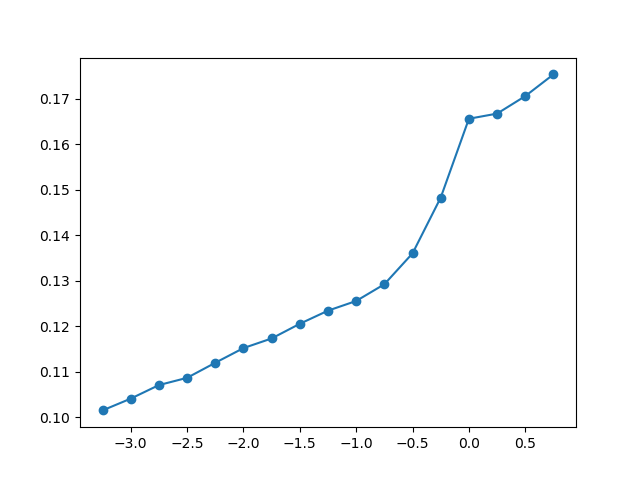

In [6]:
plt.figure()
plt.plot(keysigSI, keysigRMS, 'o-')

In [7]:

chimney = 0.014
foot = 0.155
bore = 0.019

rho = 1.2
c = 343
gamma = 1.4
P = 101000


In [37]:
# columns = (
#     'L 1', 'L 2', 'L avg' 'Inertance 1', 'Inertance 2', 'Inertance avg', 'Helmholtz f 1', 'Helmholtz f 2', 'Helmholtz avg')
# rows = ['%d mm' % x for x in np.arange(2.5, 6.75, 0.25)]

Lvals = []
Avals = []
iL = []
Hf = []

keysiguse = np.negative(keysigSI[:-4])

for k, keyval in enumerate(keysiguse):
    V = np.pi*bore**2*foot
    
    keyvalSI = keyval*0.001
    
    L = 4*keyvalSI/3
    Lvals.append(L)
    A = np.pi*chimney*(2*keyvalSI/3)
    Avals.append(A)
        
    inertance = (rho*L)/A
    iL.append(inertance)

    Hfreq = (np.sqrt((gamma*P)/V*inertance))/(2*np.pi)
    Hf.append(Hfreq)
    
# cell_text = []
# for row in range(17):
#     plt.bar(, L[1][row])
#     y_offset = y_offset + data[row]
#     cell_text.append(['%1.1f' % (x / 1000.0) for x in y_offset])
    
# plt.table(
# cellText=[])

(Lvals, Avals, iL, Hf)

([0.004333333333333334,
  0.0040000000000000001,
  0.0036666666666666666,
  0.0033333333333333335,
  0.0030000000000000005,
  0.0026666666666666666,
  0.0023333333333333335,
  0.002,
  0.0016666666666666668,
  0.0013333333333333333,
  0.001,
  0.00066666666666666664,
  0.00033333333333333332],
 [9.5294977158890396e-05,
  8.796459430051421e-05,
  8.0634211442138023e-05,
  7.3303828583761837e-05,
  6.5973445725385664e-05,
  5.8643062867009464e-05,
  5.1312680008633291e-05,
  4.3982297150257105e-05,
  3.6651914291880918e-05,
  2.9321531433504732e-05,
  2.1991148575128552e-05,
  1.4660765716752366e-05,
  7.330382858376183e-06],
 [54.567409060078404,
  54.567409060078397,
  54.567409060078397,
  54.567409060078404,
  54.567409060078404,
  54.567409060078404,
  54.567409060078397,
  54.567409060078397,
  54.567409060078404,
  54.567409060078404,
  54.567409060078397,
  54.567409060078404,
  54.567409060078404],
 [33343.955421037463,
  33343.955421037463,
  33343.955421037463,
  33343.9554210

<IPython.core.display.Javascript object>


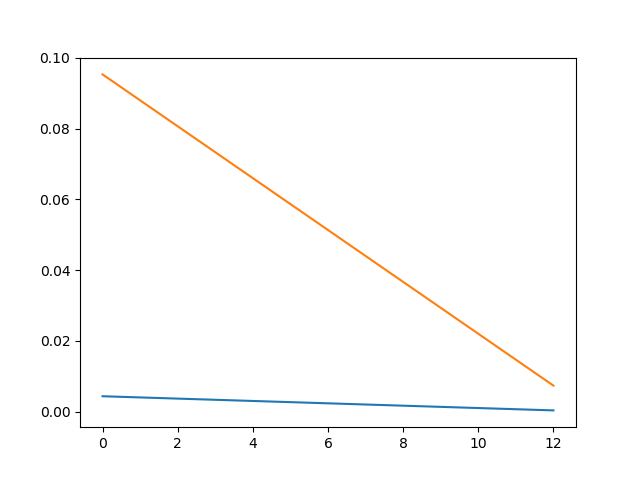

In [34]:
plt.figure()
plt.plot(Lvals)
plt.plot(Avals)